In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import itertools
from matplotlib import pyplot as plt

#prep
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, MaxAbsScaler, QuantileTransformer


#models
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, LinearRegression, Ridge, RidgeCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

#validatin libraries
from sklearn.cross_validation import KFold, StratifiedKFold
from IPython.display import display
from sklearn import metrics

#nlp specific
from sklearn.feature_extraction.text import CountVectorizer

#from sklearn.metrics import log_loss
#import sklearn as sk
from pandas.api.types import *

/data/siavashmortezavi/anaconda3/envs/fastai/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
path = '../data/final_exam_practice_question2_datafiles/'

In [4]:
!tail -50 ../data/final_exam_practice_question2_datafiles/imports-85.names.txt

   -- 15 continuous
   -- 1 integer
   -- 10 nominal

7. Attribute Information:     
     Attribute:                Attribute Range:
     ------------------        -----------------------------------------------
  1. symboling:                -3, -2, -1, 0, 1, 2, 3.
  2. normalized-losses:        continuous from 65 to 256.
  3. make:                     alfa-romero, audi, bmw, chevrolet, dodge, honda,
                               isuzu, jaguar, mazda, mercedes-benz, mercury,
                               mitsubishi, nissan, peugot, plymouth, porsche,
                               renault, saab, subaru, toyota, volkswagen, volvo
  4. fuel-type:                diesel, gas.
  5. aspiration:               std, turbo.
  6. num-of-doors:             four, two.
  7. body-style:               hardtop, wagon, sedan, hatchback, convertible.
  8. drive-wheels:             4wd, fwd, rwd.
  9. engine-location:          front, rear.
 10. wheel-base:               continuous from 86.6 120.9.
 11.

In [5]:
train = pd.read_csv(path+'imports-85.data.txt', names= ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors',
          'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width',
          'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system',
          'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg',
          'price'])

In [ ]:
#train, test = train_test_split(file, test_size=0.2)

In [ ]:
#train = train.reset_index(drop=True)
#test =  test.reset_index(drop=True)

In [6]:
train

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.30,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.00,160,5500,16,22,?


### Prepare this dataset for running Random Forest. What are the steps you need to do?

You need to make sure all the columns are numeric and categories are one hot encoded. 

### Clean Data

In [7]:
train = train.replace('?',np.nan)

In [8]:
train.isnull().sum().sort_values(ascending = False)/len(train)

normalized-losses    0.200000
price                0.019512
stroke               0.019512
bore                 0.019512
peak-rpm             0.009756
horsepower           0.009756
num-of-doors         0.009756
length               0.000000
make                 0.000000
fuel-type            0.000000
aspiration           0.000000
body-style           0.000000
drive-wheels         0.000000
engine-location      0.000000
wheel-base           0.000000
height               0.000000
width                0.000000
highway-mpg          0.000000
curb-weight          0.000000
engine-type          0.000000
num-of-cylinders     0.000000
engine-size          0.000000
fuel-system          0.000000
compression-ratio    0.000000
city-mpg             0.000000
symboling            0.000000
dtype: float64

**What type of data do I have?**
main types:
int64, float, object, category, datetime

In [ ]:
train.describe()

In [ ]:
train.info()

In [ ]:
train.head(2)

Array vs Dataframe?

In [ ]:
train['engine-location'].head(5)

## Slicing and Filtering the DataFrame

In [9]:
train[['engine-location','aspiration']].head(5)

,engine-location,aspiration
0,front,std
1,front,std
2,front,std
3,front,std
4,front,std


In [10]:
train.iloc[[0,1,2],]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500


In [11]:
train.iloc[range(7),[3,5]]

,fuel-type,num-of-doors
0,gas,two
1,gas,two
2,gas,two
3,gas,four
4,gas,four
5,gas,two
6,gas,four


In [12]:
train[train['make'] == 'mazda']

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
50,1,104,mazda,gas,std,two,hatchback,fwd,front,93.1,...,91,2bbl,3.03,3.15,9.0,68,5000,30,31,5195
51,1,104,mazda,gas,std,two,hatchback,fwd,front,93.1,...,91,2bbl,3.03,3.15,9.0,68,5000,31,38,6095
52,1,104,mazda,gas,std,two,hatchback,fwd,front,93.1,...,91,2bbl,3.03,3.15,9.0,68,5000,31,38,6795
53,1,113,mazda,gas,std,four,sedan,fwd,front,93.1,...,91,2bbl,3.03,3.15,9.0,68,5000,31,38,6695
54,1,113,mazda,gas,std,four,sedan,fwd,front,93.1,...,91,2bbl,3.08,3.15,9.0,68,5000,31,38,7395
55,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,NaN,NaN,9.4,101,6000,17,23,10945
56,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,NaN,NaN,9.4,101,6000,17,23,11845
57,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,NaN,NaN,9.4,101,6000,17,23,13645
58,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,...,80,mpfi,NaN,NaN,9.4,135,6000,16,23,15645
59,1,129,mazda,gas,std,two,hatchback,fwd,front,98.8,...,122,2bbl,3.39,3.39,8.6,84,4800,26,32,8845


In [13]:
train[train['make'].isin(['mazda','toyota'])]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
50,1,104,mazda,gas,std,two,hatchback,fwd,front,93.1,...,91,2bbl,3.03,3.15,9.0,68,5000,30,31,5195
51,1,104,mazda,gas,std,two,hatchback,fwd,front,93.1,...,91,2bbl,3.03,3.15,9.0,68,5000,31,38,6095
52,1,104,mazda,gas,std,two,hatchback,fwd,front,93.1,...,91,2bbl,3.03,3.15,9.0,68,5000,31,38,6795
53,1,113,mazda,gas,std,four,sedan,fwd,front,93.1,...,91,2bbl,3.03,3.15,9.0,68,5000,31,38,6695
54,1,113,mazda,gas,std,four,sedan,fwd,front,93.1,...,91,2bbl,3.08,3.15,9.0,68,5000,31,38,7395
55,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,NaN,NaN,9.4,101,6000,17,23,10945
56,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,NaN,NaN,9.4,101,6000,17,23,11845
57,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,NaN,NaN,9.4,101,6000,17,23,13645
58,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,...,80,mpfi,NaN,NaN,9.4,135,6000,16,23,15645
59,1,129,mazda,gas,std,two,hatchback,fwd,front,98.8,...,122,2bbl,3.39,3.39,8.6,84,4800,26,32,8845


In [14]:
print('this many columns:%d ' % len(train.columns))
train.columns

this many columns:26 


Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [ ]:
#train.columns = [  column names]

### Check for Blanks or NA's!  NaN, ", None

In [15]:
train[train['normalized-losses'].isnull()].head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
5,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
7,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
9,0,NaN,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,NaN
14,1,NaN,bmw,gas,std,four,sedan,rwd,front,103.5,...,164,mpfi,3.31,3.19,9.0,121,4250,20,25,24565
15,0,NaN,bmw,gas,std,four,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182,5400,16,22,30760
16,0,NaN,bmw,gas,std,two,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182,5400,16,22,41315
17,0,NaN,bmw,gas,std,four,sedan,rwd,front,110.0,...,209,mpfi,3.62,3.39,8.0,182,5400,15,20,36880


In [16]:
train.isnull().sum().sort_values(ascending=False)

normalized-losses    41
price                 4
stroke                4
bore                  4
peak-rpm              2
horsepower            2
num-of-doors          2
length                0
make                  0
fuel-type             0
aspiration            0
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
height                0
width                 0
highway-mpg           0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
compression-ratio     0
city-mpg              0
symboling             0
dtype: int64

In [17]:
train.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [18]:
!tail -50 ../data/final_exam_practice_question2_datafiles/imports-85.names.txt

   -- 15 continuous
   -- 1 integer
   -- 10 nominal

7. Attribute Information:     
     Attribute:                Attribute Range:
     ------------------        -----------------------------------------------
  1. symboling:                -3, -2, -1, 0, 1, 2, 3.
  2. normalized-losses:        continuous from 65 to 256.
  3. make:                     alfa-romero, audi, bmw, chevrolet, dodge, honda,
                               isuzu, jaguar, mazda, mercedes-benz, mercury,
                               mitsubishi, nissan, peugot, plymouth, porsche,
                               renault, saab, subaru, toyota, volkswagen, volvo
  4. fuel-type:                diesel, gas.
  5. aspiration:               std, turbo.
  6. num-of-doors:             four, two.
  7. body-style:               hardtop, wagon, sedan, hatchback, convertible.
  8. drive-wheels:             4wd, fwd, rwd.
  9. engine-location:          front, rear.
 10. wheel-base:               continuous from 86.6 120.9.
 11.

In [19]:
numeric_cols = ['symboling','normalized-losses','wheel-base','length','width','height','curb-weight','engine-size','bore','stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg','price']

In [20]:
categorical_cols = [x for x in train.columns if x not in numeric_cols]

In [21]:
len(categorical_cols), len(numeric_cols)

(10, 16)

In [22]:
for col in categorical_cols:
    train[col] = train[col].astype('category')
for col in numeric_cols:
    train[col] = train[col].astype('float64')

In [23]:
train.dtypes

symboling             float64
normalized-losses     float64
make                 category
fuel-type            category
aspiration           category
num-of-doors         category
body-style           category
drive-wheels         category
engine-location      category
wheel-base            float64
length                float64
width                 float64
height                float64
curb-weight           float64
engine-type          category
num-of-cylinders     category
engine-size           float64
fuel-system          category
bore                  float64
stroke                float64
compression-ratio     float64
horsepower            float64
peak-rpm              float64
city-mpg              float64
highway-mpg           float64
price                 float64
dtype: object

In [24]:
train.isnull().sum().sort_values(ascending = False)

normalized-losses    41
price                 4
stroke                4
bore                  4
peak-rpm              2
horsepower            2
num-of-doors          2
length                0
make                  0
fuel-type             0
aspiration            0
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
height                0
width                 0
highway-mpg           0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
compression-ratio     0
city-mpg              0
symboling             0
dtype: int64

In [25]:
for col in numeric_cols:
    train[col].fillna(0,inplace = True)
for col in categorical_cols:
    train[col].fillna(method = 'bfill',inplace = True)


In [26]:
train.isnull().sum().sort_values(ascending = False)

price                0
highway-mpg          0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
symboling            0
dtype: int64

In [27]:
train[categorical_cols]

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi
5,audi,gas,std,two,sedan,fwd,front,ohc,five,mpfi
6,audi,gas,std,four,sedan,fwd,front,ohc,five,mpfi
7,audi,gas,std,four,wagon,fwd,front,ohc,five,mpfi
8,audi,gas,turbo,four,sedan,fwd,front,ohc,five,mpfi
9,audi,gas,turbo,two,hatchback,4wd,front,ohc,five,mpfi


### Feature Engineering
How to transform a column/ apply a functin against it
create as much columns as you can. 
#fld.dt.....
#train_cats
#apply_cats

In [ ]:
## two ways to creat new fields

#train_df['LogSalePrice'] = train_df['SalePrice'].map(lambda x : np.log(x)) 
#or
#train_df['LogSalePrice'] = np.log(train_df['SalePrice'])

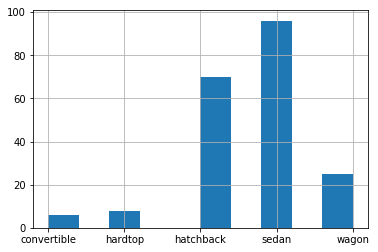

In [28]:
train['body-style'].hist()

In [ ]:
## To make a categorical
#train_df['above_200k'] = train_df['SalePrice'].map(lambda x : 1 if x > 200000 else 0) 
#train_df['above_200k'] = train_df['above_200k'].astype('category')

In [ ]:
#train_df.loc[train_df['SalePrice']>200000,'above_200k'] = 1
#train_df.loc[train_df['SalePrice']<=200000,'above_200k'] = 0
#train_df['above_200k'] = train_df['above_200k'].astype('category')

In [ ]:
#adding columns together

#train_df['LivArea_Total'] = train_df['GrLivArea'] + train_df['GarageArea'] + train_df['PoolArea']
#train_df[['LivArea_Total','GrLivArea','GarageArea','PoolArea']].head()

In [ ]:

# Using the Apply function

#train_df['Lot_desc'] = train_df.apply(lambda val : val['MSZoning'] + val['LotShape'], axis=1)
#train_df[['Lot_desc','MSZoning','LotShape']].head()

StandardScaler - subtract the mean and divide by std

MaxAbsScaler - transform down to [-1, 1] bounds

QuantileTransformer - transform down to [0 1] bounds

In [ ]:
#train_df['LotArea_norm'] = train_df['LotArea']

#ss = StandardScaler()
#mas = MaxAbsScaler()
#qs = QuantileTransformer()
#train_df['LotArea_norm'] = ss.fit_transform(train_df[['LotArea']])
#train_df['LotArea_mas'] = mas.fit_transform(train_df[['LotArea']])
#train_df['LotArea_qs'] = qs.fit_transform(train_df[['LotArea']])


#train_df[['LotArea_norm','LotArea_mas','LotArea_qs', 'LotArea']].head(5)

In [29]:
train

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3.0,0.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130.0,mpfi,3.47,2.68,9.00,111.0,5000.0,21.0,27.0,13495.0
1,3.0,0.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130.0,mpfi,3.47,2.68,9.00,111.0,5000.0,21.0,27.0,16500.0
2,1.0,0.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152.0,mpfi,2.68,3.47,9.00,154.0,5000.0,19.0,26.0,16500.0
3,2.0,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109.0,mpfi,3.19,3.40,10.00,102.0,5500.0,24.0,30.0,13950.0
4,2.0,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136.0,mpfi,3.19,3.40,8.00,115.0,5500.0,18.0,22.0,17450.0
5,2.0,0.0,audi,gas,std,two,sedan,fwd,front,99.8,...,136.0,mpfi,3.19,3.40,8.50,110.0,5500.0,19.0,25.0,15250.0
6,1.0,158.0,audi,gas,std,four,sedan,fwd,front,105.8,...,136.0,mpfi,3.19,3.40,8.50,110.0,5500.0,19.0,25.0,17710.0
7,1.0,0.0,audi,gas,std,four,wagon,fwd,front,105.8,...,136.0,mpfi,3.19,3.40,8.50,110.0,5500.0,19.0,25.0,18920.0
8,1.0,158.0,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131.0,mpfi,3.13,3.40,8.30,140.0,5500.0,17.0,20.0,23875.0
9,0.0,0.0,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131.0,mpfi,3.13,3.40,7.00,160.0,5500.0,16.0,22.0,0.0


In [30]:
y = train['price'].values
X = train[train.columns[train.columns!='price']]

In [31]:
y

array([ 13495.,  16500.,  16500.,  13950.,  17450.,  15250.,  17710.,
        18920.,  23875.,      0.,  16430.,  16925.,  20970.,  21105.,
        24565.,  30760.,  41315.,  36880.,   5151.,   6295.,   6575.,
         5572.,   6377.,   7957.,   6229.,   6692.,   7609.,   8558.,
         8921.,  12964.,   6479.,   6855.,   5399.,   6529.,   7129.,
         7295.,   7295.,   7895.,   9095.,   8845.,  10295.,  12945.,
        10345.,   6785.,      0.,      0.,  11048.,  32250.,  35550.,
        36000.,   5195.,   6095.,   6795.,   6695.,   7395.,  10945.,
        11845.,  13645.,  15645.,   8845.,   8495.,  10595.,  10245.,
        10795.,  11245.,  18280.,  18344.,  25552.,  28248.,  28176.,
        31600.,  34184.,  35056.,  40960.,  45400.,  16503.,   5389.,
         6189.,   6669.,   7689.,   9959.,   8499.,  12629.,  14869.,
        14489.,   6989.,   8189.,   9279.,   9279.,   5499.,   7099.,
         6649.,   6849.,   7349.,   7299.,   7799.,   7499.,   7999.,
         8249.,   89

In [32]:
X.shape

(205, 25)

In [33]:
train.shape

(205, 26)

## Turning categories into numerics

In [34]:
X = pd.get_dummies(X)

In [35]:
X

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,num-of-cylinders_twelve,num-of-cylinders_two,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,3.0,0.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
1,3.0,0.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
2,1.0,0.0,94.5,171.2,65.5,52.4,2823.0,152.0,2.68,3.47,...,0,0,0,0,0,0,0,1,0,0
3,2.0,164.0,99.8,176.6,66.2,54.3,2337.0,109.0,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0
4,2.0,164.0,99.4,176.6,66.4,54.3,2824.0,136.0,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0
5,2.0,0.0,99.8,177.3,66.3,53.1,2507.0,136.0,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0
6,1.0,158.0,105.8,192.7,71.4,55.7,2844.0,136.0,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0
7,1.0,0.0,105.8,192.7,71.4,55.7,2954.0,136.0,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0
8,1.0,158.0,105.8,192.7,71.4,55.9,3086.0,131.0,3.13,3.40,...,0,0,0,0,0,0,0,1,0,0
9,0.0,0.0,99.5,178.2,67.9,52.0,3053.0,131.0,3.13,3.40,...,0,0,0,0,0,0,0,1,0,0


In [36]:
X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size=.2)

In [37]:
print(X_train.shape, X_valid.shape, y_train.shape, y_valid.shape)

(164, 75) (41, 75) (164,) (41,)


**Fitting a Linear Model**

In [ ]:
lm = LinearRegression()
lm.fit(X_train,y_train)

In [ ]:
lm.score(X_train,y_train)

In [ ]:
lm.score(X_valid,y_valid)

In [ ]:
y_pred = lm.predict(X_valid)

In [ ]:
rmse = np.sqrt(metrics.mean_squared_error(y_pred, y_valid))
rmse

In [ ]:
metrics.mean_absolute_error(y_pred,y_valid)

In [ ]:
rdgCV = RidgeCV(alphas=[0.01,0.1,1,10,100,1000], cv=5)
rdgCV.fit(X_train,y_train)

In [ ]:
print(rdgCV.alpha_)

In [ ]:
rdg = Ridge(alpha=10)
rdg.fit(X_train,y_train)
rdg.score(X_valid,y_valid)

In [ ]:
y_pred = rdg.predict(X_valid)
rmse = np.sqrt(metrics.mean_squared_error(y_pred, y_valid))
rmse

** Random forest implementation **

In [38]:
rfr = RandomForestRegressor(n_jobs=-1)
rfr.fit(X,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [39]:
rfr.score(X_train,y_train),rfr.score(X_valid,y_valid)

(0.96258461592778066, 0.97691510127248704)

In [40]:
y_pred = rfr.predict(X_valid)
rmse = np.sqrt(metrics.mean_squared_error(y_pred, y_valid))
rmse

1124.9352565652011

In [42]:
#def rmse(predictions, targets):
#    return np.sqrt(((predictions - targets) ** 2).mean())
#rmse(rfr.predict(X_valid),y_valid)

1124.9352565652011

In [ ]:
y_valid.shape, y_pred.shape

### Log Likelihood

In [ ]:
np.sqrt((np.square(np.log((y_pred)+.0001)-np.log((y_valid)+.0001))).sum()/len(y_pred))

In [ ]:
preds = np.stack([t.predict(X_valid) for t in rfr.estimators_])

In [ ]:
preds

In [ ]:
rfr.estimators_

### Grid Search/Randomized Search: the quest for hyperparameters

In [ ]:
params = {
    'max_features': [0.25, 0.5, 0.7],
    'max_depth' : [ 2,5,10,20]
}
gs = GridSearchCV(cv=5, param_grid=params, estimator=rfr, verbose=0)
gs.fit(X_train,y_train.ravel())
print(gs.best_params_, gs.best_score_,rs.score(X_valid,y_valid))

In [ ]:
params = {
    'max_features': [0.25, 0.5, 0.7],
    'max_depth' : [ 2,5,10,20]
}
rs = RandomizedSearchCV(cv=5, param_distributions=params, estimator=rfr, verbose=0)
rs.fit(X_train,y_train.ravel())
print(rs.best_params_, rs.best_score_, rs.score(X_valid,y_valid))

In [ ]:
rfr.score(X_valid,y_valid)


In [ ]:
gs.score(X_valid,y_valid)

In [ ]:
rs.score(X_valid,y_valid)

In [ ]:
y_pred = pd.DataFrame({'test':y_pred.tolist()})

In [ ]:
y_true = pd.DataFrame({'test':y_true.tolist()})

In [ ]:
metrics.classification_report(y_true, y_pred, labels =None)